https://qiita.com/0NE_shoT_/items/c42d8093e2fed9bf1b7a

In [34]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200000, n_features=20, n_informative=2, n_redundant=2)

In [33]:
import pandas as pd
# Xをデータフレームに変換
X_df = pd.DataFrame(X)
# データフレームの最初の5行を表示
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.366209,0.073682,0.252865,0.095461,1.464949,-1.356478,-1.221864,-0.759587,1.334384,-1.009573,0.825887,-0.054001,1.569960,-2.891699,-0.068381,-1.952914,-1.198182,1.169903,-1.504805,-1.304413
1,1.957047,-1.658923,0.130103,-0.598455,0.059104,-1.459825,-1.109454,1.100434,-0.395529,-0.504215,-1.092709,-0.926667,-0.605394,-2.614553,1.815005,1.340622,-0.995397,0.940668,-0.239948,0.057725
2,-1.867017,0.250916,0.825095,0.064071,2.540088,-0.452660,-0.417180,0.742091,1.064707,1.375448,0.695932,0.279972,-0.286539,-0.987821,0.092977,-0.369986,-0.326305,0.309940,0.927058,-0.243606
3,-0.796776,-0.011813,-0.213272,0.065731,0.265295,0.257104,0.207023,-2.079953,1.886478,-0.196287,1.051832,-0.295048,-0.189031,0.488618,0.081235,1.449065,-0.408192,0.448930,2.134949,0.113275
4,0.624687,-0.566554,0.111854,-0.201340,0.508144,0.992800,0.932808,1.037411,0.355991,-0.638373,-0.933605,0.515719,0.859679,2.209694,0.142433,0.873994,0.193929,0.560372,-1.851355,0.364697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.012735,-0.479900,0.115526,-0.917336,-0.374174,-0.727069,-0.371073,-2.318911,-0.283705,0.475428,0.548326,-0.348790,-0.779508,-0.862842,-0.105527,-0.637864,1.002221,1.787096,-1.010133,-0.166580
199996,-0.387132,-0.024251,0.306215,-1.488258,-1.423061,-1.013399,-0.455759,0.899375,-0.162885,-0.568769,-1.269216,0.254984,0.481026,-1.053894,-0.591571,0.709237,-0.470448,-0.722755,1.007663,-0.965767
199997,0.676681,-0.116934,-0.720440,-0.581317,-1.485621,0.424908,0.544347,0.472608,0.453498,0.985262,0.014250,-0.355855,0.219542,1.297007,-0.416597,0.709768,-0.920372,-0.428512,-2.190282,-0.090253
199998,-0.348438,0.254578,0.081458,-0.618015,-1.815993,-0.553335,-0.305886,1.063980,0.822263,-0.286552,0.935135,-0.752354,1.551831,-0.713506,-1.375047,-0.263707,0.571384,1.366900,2.061019,1.419075


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0) # 50%のデータを学習データに、50%を検証データにする

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

LogisticRegression()

In [11]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[-7.54892198e-04 -6.62579777e-04 -5.82220768e-03  3.79300110e+00
  -1.04807505e-02  1.10576617e+00 -1.38406514e-01 -7.92876142e-03
   1.81973329e-02  4.79907396e-03  4.10695724e-03 -2.06734827e-02
   1.02962827e-02 -3.88908171e-01  5.53350242e-03  6.52633538e-03
   5.37627041e-03  9.25134229e-04 -1.22291960e-02 -7.81843147e-03]]
intercept =  [0.26959726]


In [12]:
probs = lr.predict_proba(X_test)
print(probs)

[[9.59028014e-01 4.09719864e-02]
 [1.49077289e-05 9.99985092e-01]
 [9.37928147e-01 6.20718533e-02]
 ...
 [8.28000725e-01 1.71999275e-01]
 [9.80828519e-01 1.91714815e-02]
 [3.87631496e-03 9.96123685e-01]]


In [19]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

prob = lr.predict_proba(X_test)[:, 1] # 目的変数が1である確率を予測
prob

array([0.04097199, 0.99998509, 0.06207185, ..., 0.17199928, 0.01917148,
       0.99612369])

In [20]:
prob_true, prob_pred = calibration_curve(y_true=Y_test, y_prob=prob, n_bins=20)

In [21]:
prob_true

array([0.01908524, 0.0643521 , 0.09117841, 0.13186298, 0.18431122,
       0.22025316, 0.25936073, 0.33299075, 0.38720539, 0.46254459,
       0.50877193, 0.56305732, 0.63824885, 0.67391304, 0.74707471,
       0.8067557 , 0.86149068, 0.9198636 , 0.9602418 , 0.99115719])

In [22]:
prob_pred

array([0.01231652, 0.07189598, 0.12341838, 0.17364478, 0.22390685,
       0.27407584, 0.3253839 , 0.37488799, 0.42502752, 0.47489655,
       0.52451022, 0.57550587, 0.62578142, 0.67584542, 0.72565183,
       0.77594891, 0.82619012, 0.87651213, 0.92835356, 0.99014989])

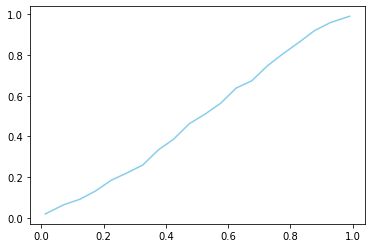

In [29]:
fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, label='calibration plot', color='skyblue') # キャリプレーションプロットを作成
# ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen') # 45度線をプロット
# ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
# ax2 = ax1.twinx() # 2軸を追加
# ax2.hist(prob, bins=20, histtype='step', color='orangered') # スコアのヒストグラムも併せてプロット
plt.show()

In [30]:
from sklearn.metrics import log_loss
print('logistic loss = ', log_loss(y_true=Y_test, y_pred=prob))

logistic loss =  0.17724347059719003


In [31]:
from sklearn.metrics import brier_score_loss
print('brier score = ', brier_score_loss(y_true=Y_test, y_prob=prob))

brier score =  0.048163808423541
